In [1]:
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
from torch.optim.lr_scheduler import ReduceLROnPlateau

import numpy as np
import pandas as pd

import model_predict
from sklearn.model_selection import train_test_split

In [2]:
series, scaler = model_predict.read_data_series(scale=True)

In [3]:
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size,
                          num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        self.init_weights()

    def forward(self, x):
        out, _ = self.gru(x)
        out = self.fc(out[:, -1, :])  # 使用最后一个时间步的输出
        return out

    def init_weights(self):
        # 遍历参数，对参数进行初始化
        for name, param in self.named_parameters():
            if 'weight' in name:
                nn.init.normal_(param, mean=0, std=0.1)  # 使用正态分布初始化权重
            elif 'bias' in name:
                nn.init.constant_(param, 0)  # 将偏置项初始化为零


model_parameters = {
    "input_size": 3, "hidden_size": 32, "num_layers": 1, "output_size": 1
}

In [5]:
model = model_predict.load_rnn_model_best(GRUModel, model_parameters)

从2019年9月开始后续数据推理
MSE: 140.73
MAE: 8.90
R^2: 0.88
MAPE: 0.20


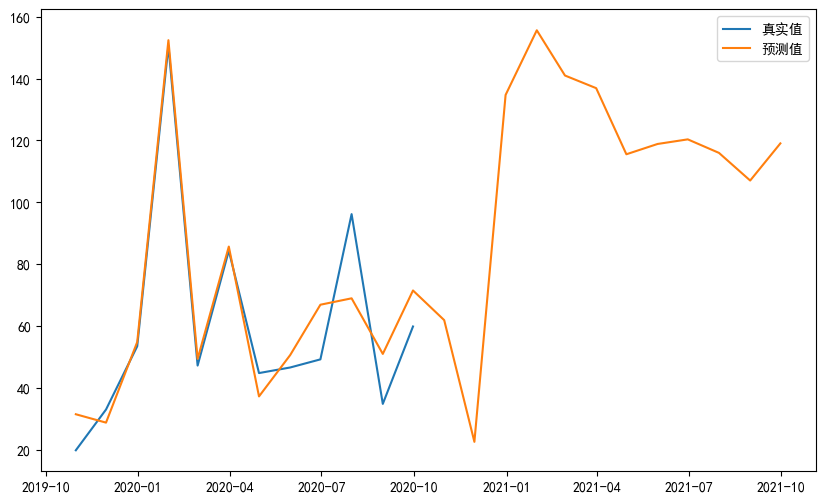

array([ 31.43745374,  28.72974113,  54.79721532, 152.39146648,
        49.32668178,  85.65632637,  37.20690114,  50.5858397 ,
        66.8541809 ,  68.92312216,  50.9432163 ,  71.45717558,
        61.86725346,  22.51852453, 134.68575856, 155.5952734 ,
       140.96576571, 136.87893981, 115.50387046, 118.83234494,
       120.3230349 , 115.94987309, 107.00969862, 119.02164353])

In [7]:
from importlib import reload
reload(model_predict)
model_predict.predict_to_future_rnn(model, series, scaler)

In [4]:
model_predict.train_rnn_model(GRUModel, model_parameters, series)

训练 GRUModel 模型
结果保存到： GRUModel_best.pth
Epoch [50/1000], Learn Rate: 1.0000e-03, Training Loss: 0.2077, Validation Loss: 0.0834
Epoch [100/1000], Learn Rate: 1.0000e-03, Training Loss: 0.1581, Validation Loss: 0.1303
Epoch [150/1000], Learn Rate: 1.0000e-03, Training Loss: 0.1477, Validation Loss: 0.1328
Epoch [200/1000], Learn Rate: 1.0000e-03, Training Loss: 0.1341, Validation Loss: 0.1309
Epoch [250/1000], Learn Rate: 1.0000e-03, Training Loss: 0.1155, Validation Loss: 0.1433
Epoch [300/1000], Learn Rate: 5.0000e-04, Training Loss: 0.1021, Validation Loss: 0.1328
Epoch [350/1000], Learn Rate: 5.0000e-04, Training Loss: 0.0948, Validation Loss: 0.1600
Epoch [400/1000], Learn Rate: 5.0000e-04, Training Loss: 0.0849, Validation Loss: 0.1842
Epoch [450/1000], Learn Rate: 5.0000e-04, Training Loss: 0.0752, Validation Loss: 0.2017
Epoch [500/1000], Learn Rate: 5.0000e-04, Training Loss: 0.0671, Validation Loss: 0.2116
Epoch [550/1000], Learn Rate: 5.0000e-04, Training Loss: 0.0561, Valida